In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [194]:
df= pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

In [195]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [196]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

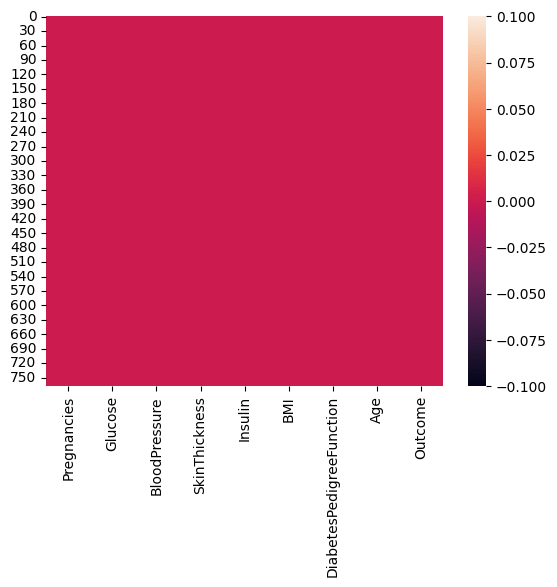

In [198]:
sns.heatmap(df.isna())

In [199]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Pregnancies', ylabel='Count'>

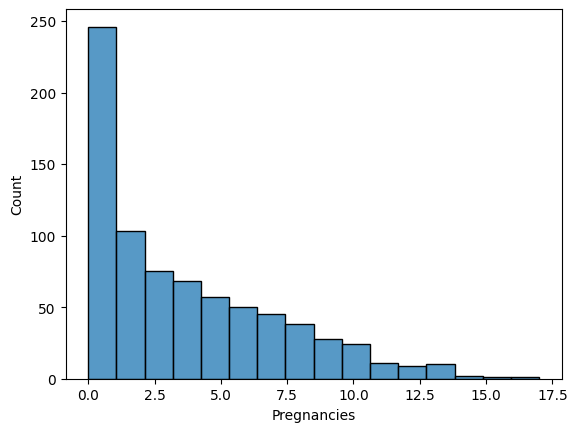

In [200]:
#for i in range(len(df['Outcome'])):
sns.histplot(df['Pregnancies'])

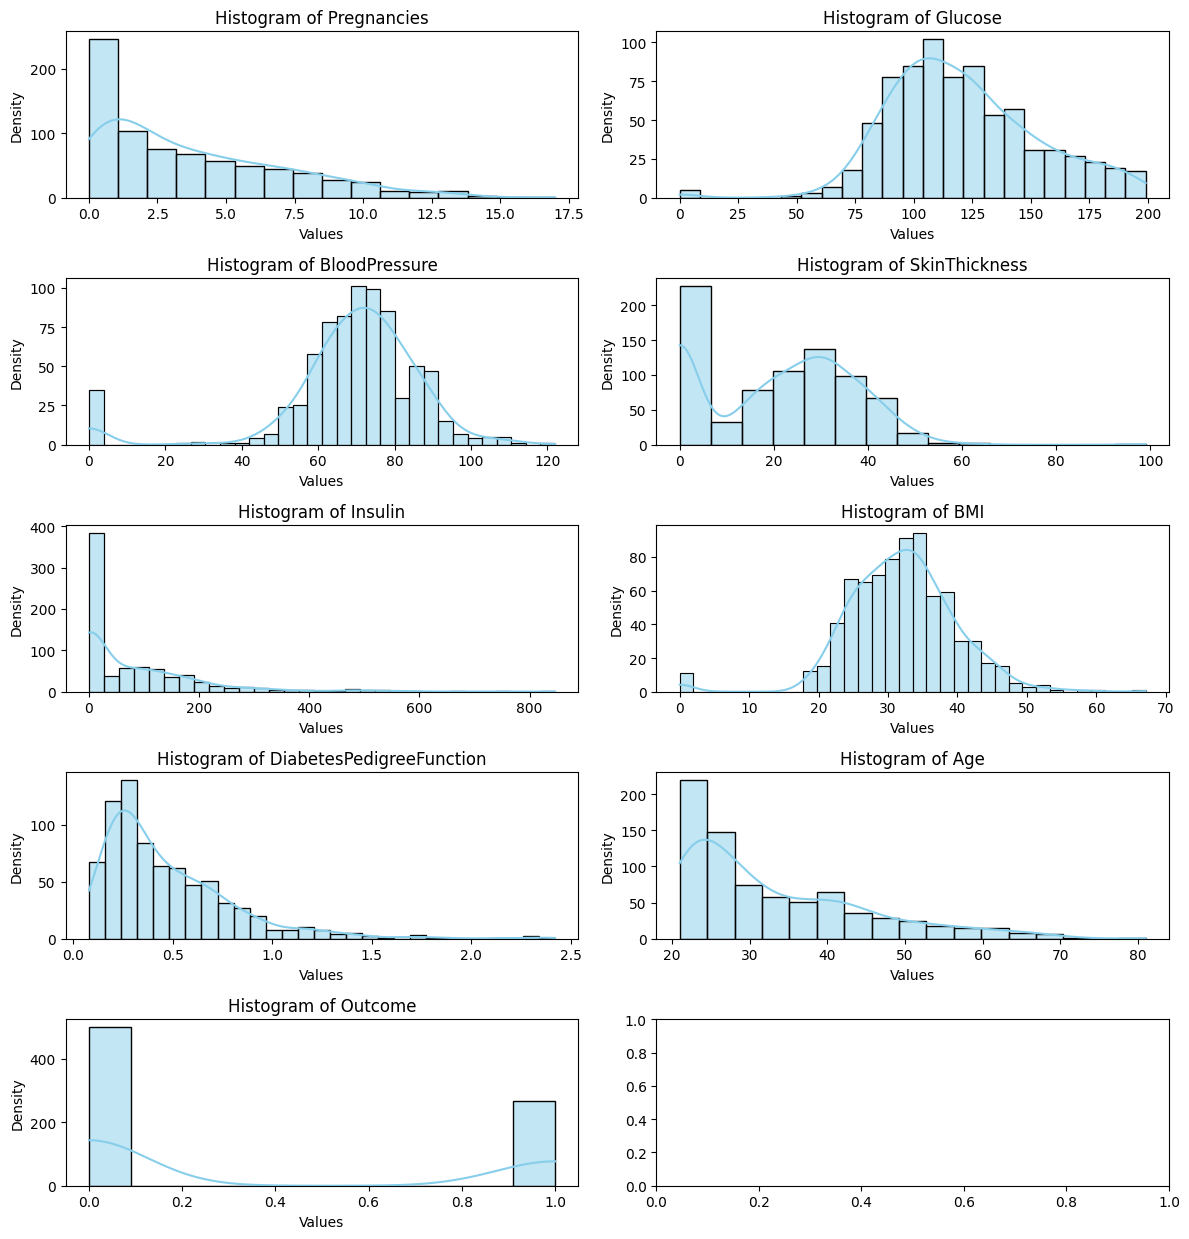

In [201]:
# Set up subplots to create a histogram for each column
num_columns = len(df.columns)
num_rows = int(np.ceil(num_columns / 2))

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 2.5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and create histplot for each
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

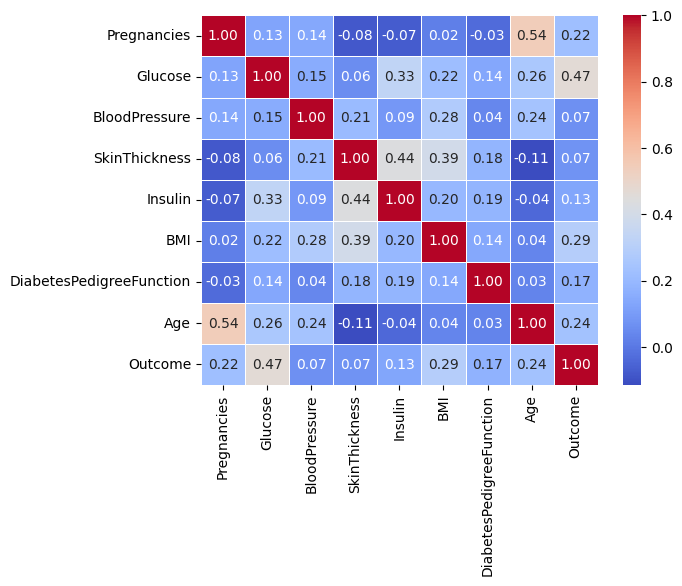

In [202]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Text(0.5, 1.0, 'Count Plot of Outcome')

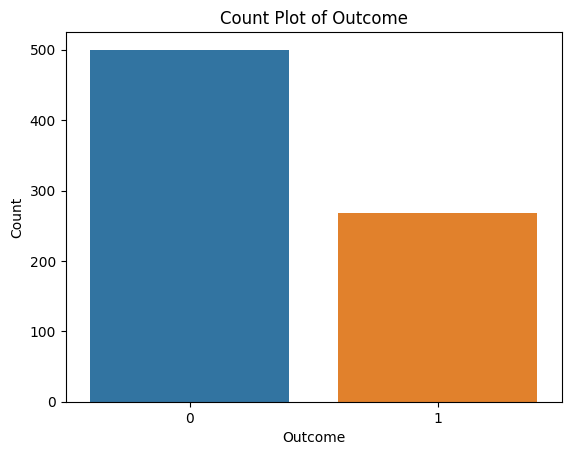

In [203]:
# Create a count plot
sns.countplot(data=df, x='Outcome')

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count Plot of Outcome')

In [204]:
def remove_outliers(df, column_name):
    """
    Remove outliers from a numerical column in a DataFrame using the boxplot method.

    Parameters:
    - df: DataFrame
    - column_name: str, the name of the numerical column containing outliers

    Returns:
    - DataFrame without outliers
    """
    # Copy the DataFrame to avoid modifying the original
    df_no_outliers = df.copy()

    # Calculate the first and third quartiles
    Q1 = df_no_outliers[column_name].quantile(0.25)
    Q3 = df_no_outliers[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with values outside the bounds
    df_no_outliers = df_no_outliers[(df_no_outliers[column_name] >= lower_bound) & (df_no_outliers[column_name] <= upper_bound)]

    return df_no_outliers

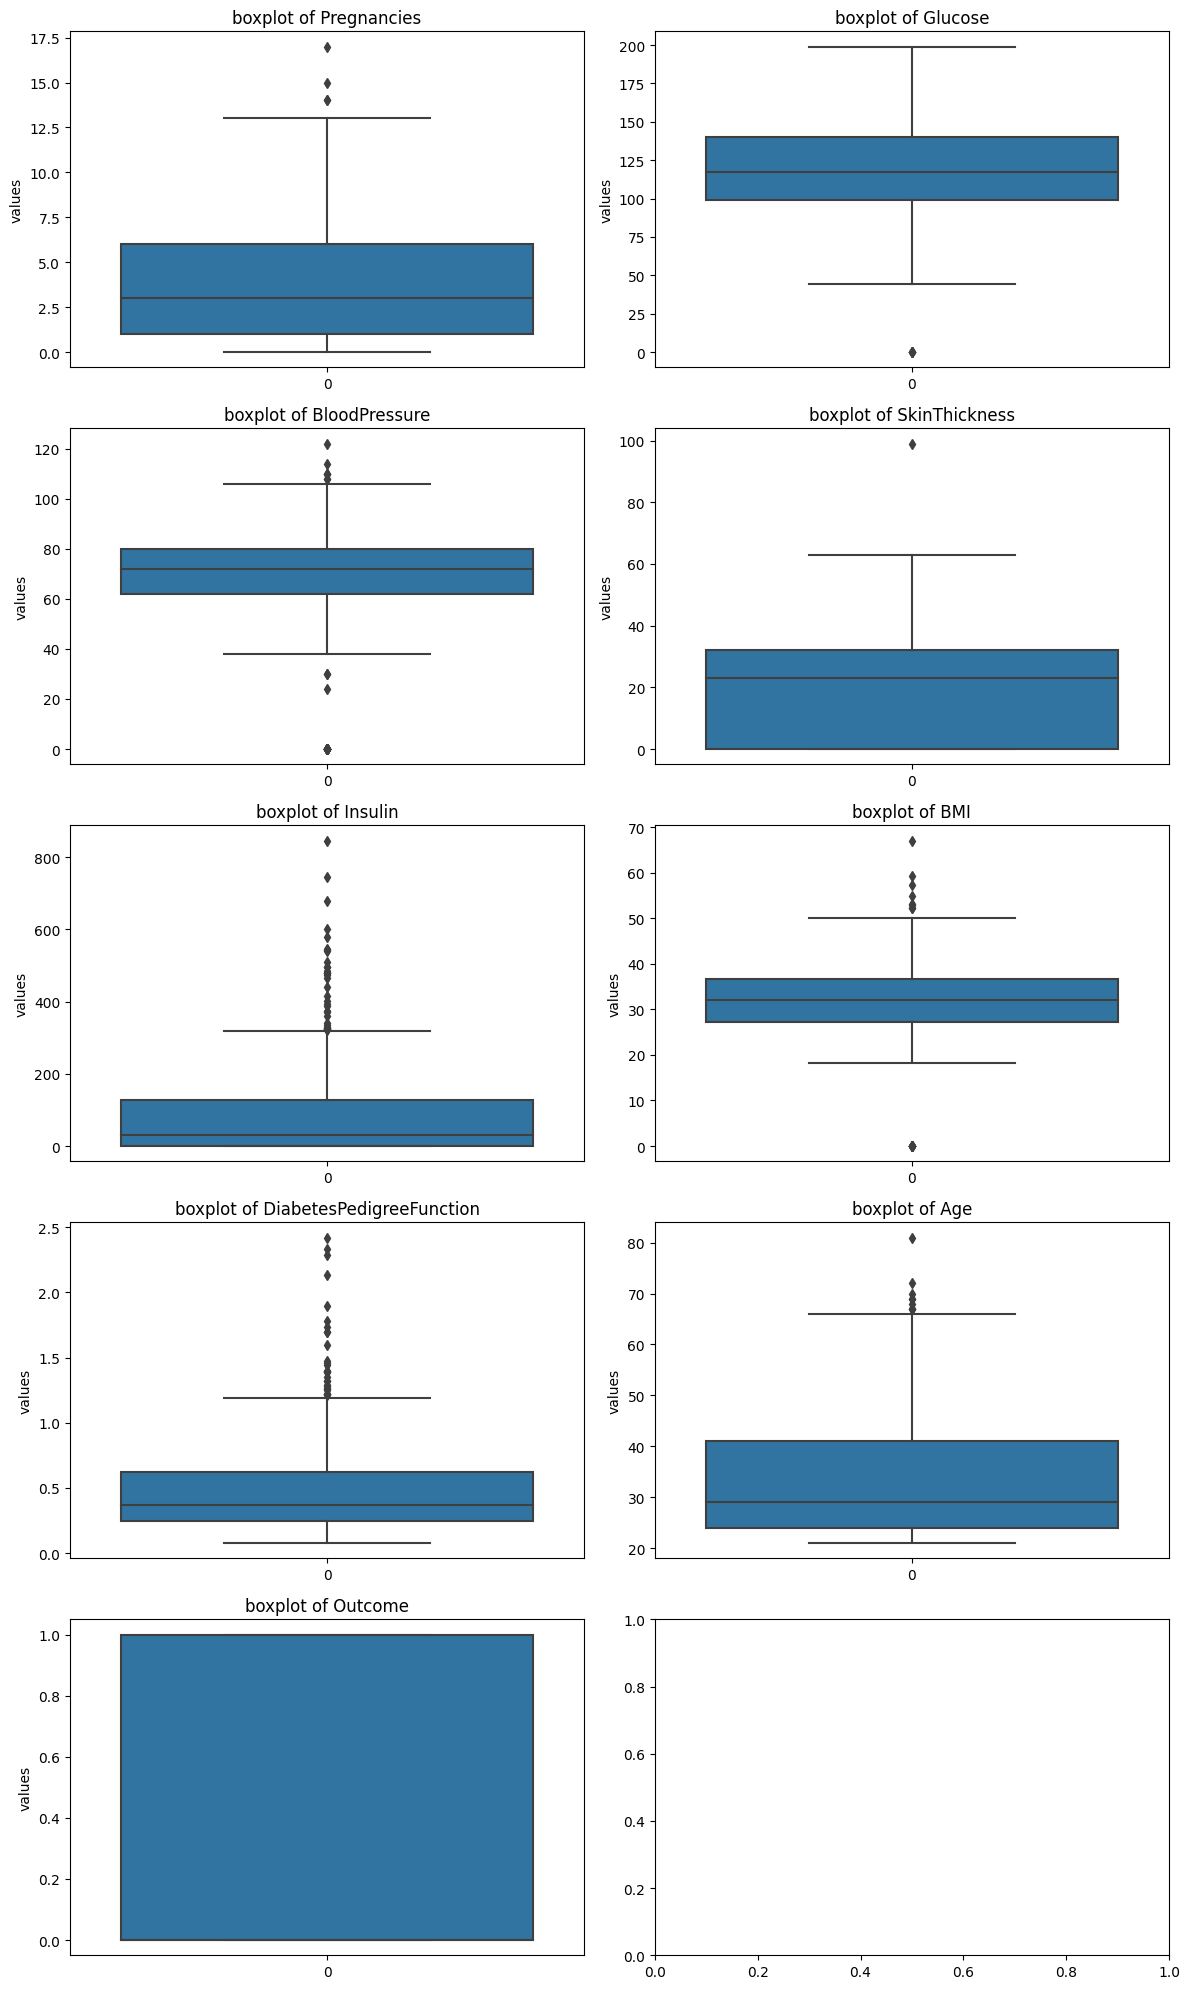

In [205]:
# Set up subplots to create a boxplot for each column
num_columns = len(df.columns)
num_rows = int(np.ceil(num_columns / 2))

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax = axes[i])
    axes[i].set_title(f'boxplot of {column}')
   #axes[i].set_xlabel('Values')
    axes[i].set_ylabel('values')

# Adjust layout
plt.tight_layout()
plt.show();

In [206]:
pos = (df["Outcome"] == 1)
neg = (df["Outcome"] == 0)

In [207]:
pos

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Outcome, Length: 768, dtype: bool

In [208]:
df["Glucose"][pos]

0      148
2      183
4      137
6       78
8      197
      ... 
755    128
757    123
759    190
761    170
766    126
Name: Glucose, Length: 268, dtype: int64

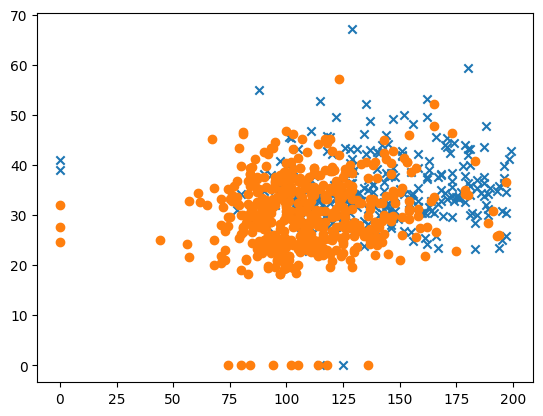

In [209]:
#for i in range(len(df["Outcome"])):
plt.scatter(df["Glucose"][pos], df["BMI"][pos]  ,marker = 'x' , label = "y = 1" )
plt.scatter(df["Glucose"][neg] ,df["BMI"][neg]  ,marker = 'o' , label = "y = 0" )

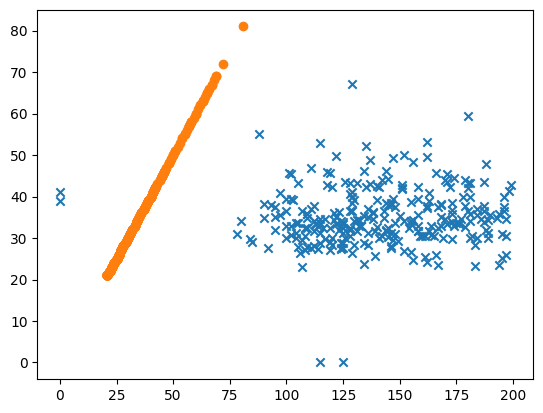

In [210]:
plt.scatter(df["Glucose"][pos], df["BMI"][pos]  ,marker = 'x' , label = "y = 1" )
plt.scatter(df["Age"][neg] ,df["Age"][neg]  ,marker = 'o' , label = "y = 0" )

Text(0.5, 0.92, '3D Scatter Plot')

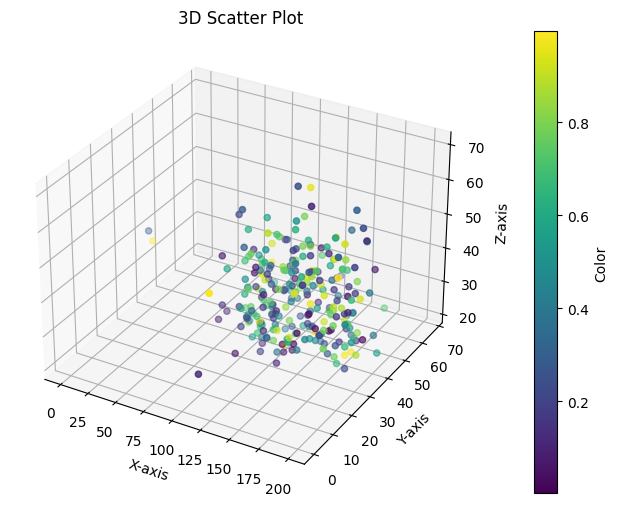

In [211]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = np.random.rand(268)
scatter = ax.scatter(df["Glucose"][pos], df["BMI"][pos], df["Age"][pos], c=colors, marker='o', cmap='viridis')
# Add a colorbar for reference
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Color')
# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot')

In [212]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

In [214]:
x_train = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_train = df['Outcome']

In [215]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [216]:
from sklearn.preprocessing import StandardScaler
# Initialize the class
scaler_linear = StandardScaler()

#Compute the mean and standard deviation of the training set then transform it
x_train_scaled = scaler_linear.fit_transform(x_train)

In [217]:
model = LogisticRegression(max_iter = 10000)
model.fit(x_train_scaled , y_train)

LogisticRegression(max_iter=10000)

In [218]:
x_test_scaled = scaler_linear.fit_transform(x_test)

In [219]:
yhat = model.predict(x_test_scaled)
yhat.shape

(154,)

In [220]:
# Evaluate the model
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)

In [221]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.79
Confusion Matrix:
[[86 13]
 [20 35]]


Text(0.5, 1.0, 'Confusion Matrix')

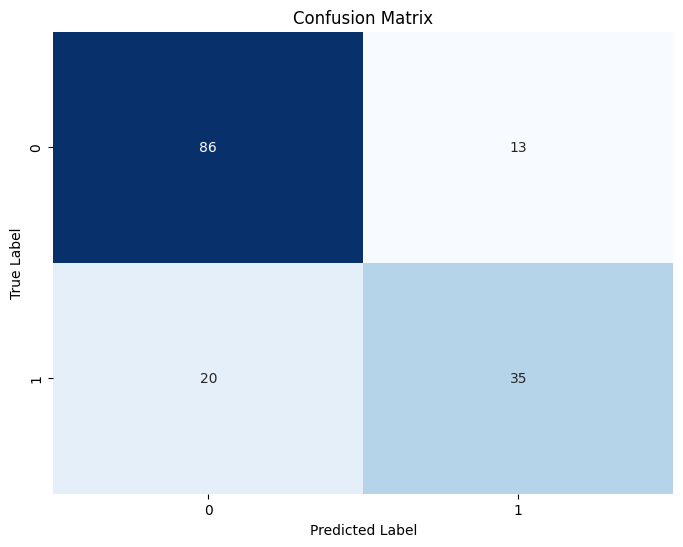

In [222]:
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [224]:
logloss = log_loss(y_test, model.predict_proba(x_test_scaled))

In [225]:
logloss

0.5020266251400922

In [226]:
from xgboost import XGBClassifier

In [227]:
model = XGBClassifier()
model.fit(x_train , y_train)
yhat = model.predict(x_test)

In [228]:
# Evaluate the model
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)

In [229]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.71
Confusion Matrix:
[[73 26]
 [19 36]]


Text(0.5, 1.0, 'Confusion Matrix')

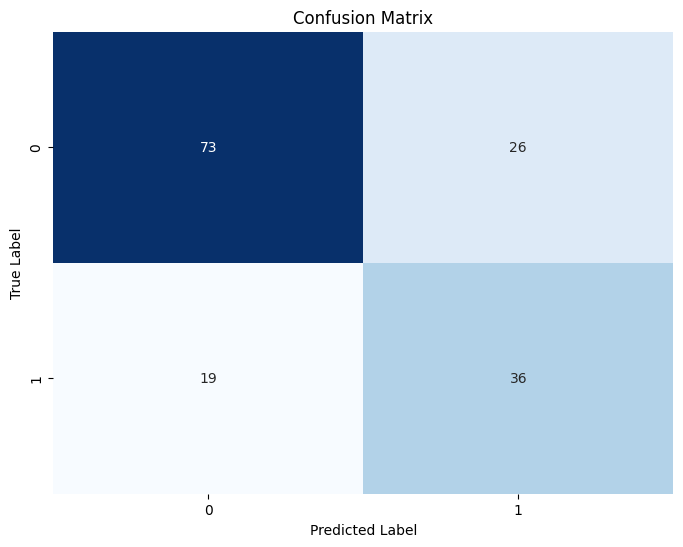

In [230]:
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [231]:
from sklearn.linear_model import SGDClassifier
# Create and train the SGDClassifier
clf = SGDClassifier(loss='log_loss', alpha=0.0001, max_iter=100000, random_state=42)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [232]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB

def train_and_evaluate_classifiers(X_train, y_train):
    classifiers = {
        'SGDClassifier': SGDClassifier(),
        'LogisticRegression': LogisticRegression(),
        'SVC': SVC(),
        'RandomForestClassifier': RandomForestClassifier(),
        'KNeighborsClassifier': KNeighborsClassifier(),
        'GaussianNB': GaussianNB()  # Adding Gaussian Naive Bayes
    }

    for clf_name, clf_model in classifiers.items():
        # Train the classifier
        clf_model.fit(X_train, y_train)
        
        # Perform cross-validation and compute scores
        cv_accuracy = cross_val_score(clf_model, X_train, y_train, cv=3, scoring='accuracy')
        cv_precision = cross_val_score(clf_model, X_train, y_train, cv=3, scoring='precision')
        cv_f1 = cross_val_score(clf_model, X_train, y_train, cv=3, scoring='f1')
        
        # Print metrics for each classifier
        print(f"Classifier: {clf_name}")
        print(f"Accuracy: {np.mean(cv_accuracy)}")
        print(f"Precision: {np.mean(cv_precision)}")
        print(f"F1-Score: {np.mean(cv_f1)}")
        print("----------------------")
train_and_evaluate_classifiers(x_train_scaled, y_train)        

Classifier: SGDClassifier
Accuracy: 0.7670811413996493
Precision: 0.5651515151515151
F1-Score: 0.5208138996958872
----------------------
Classifier: LogisticRegression
Accuracy: 0.7670492587278814
Precision: 0.6994117747937781
F1-Score: 0.6293859649122808
----------------------
Classifier: SVC
Accuracy: 0.7573250438386737
Precision: 0.6883590899924839
F1-Score: 0.6109419219884336
----------------------
Classifier: RandomForestClassifier
Accuracy: 0.7654790371433126
Precision: 0.7189429012345679
F1-Score: 0.642201199302642
----------------------
Classifier: KNeighborsClassifier
Accuracy: 0.744300972421489
Precision: 0.6592197741451473
F1-Score: 0.5997161157918635
----------------------
Classifier: GaussianNB
Accuracy: 0.7475211222700463
Precision: 0.6541526919802302
F1-Score: 0.6130119054604181
----------------------


In [233]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2']
}

logistic_grid_search = GridSearchCV(LogisticRegression(), logistic_param_grid, cv=3)
logistic_grid_search.fit(x_train_scaled, y_train)

print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best score for Logistic Regression:", logistic_grid_search.best_score_)


# SVC
svc_param_grid = {'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf']
}

svc_grid_search = GridSearchCV(SVC(), svc_param_grid, cv=3)
svc_grid_search.fit(x_train_scaled, y_train)

print("Best parameters for SVC:", svc_grid_search.best_params_)
print("Best score for SVC:", svc_grid_search.best_score_)

# SGD Classifier
sgd_param_grid = {
    'loss': ['hinge', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

sgd_grid_search = GridSearchCV(SGDClassifier(), param_grid=sgd_param_grid, cv=3)
sgd_grid_search.fit(x_train_scaled, y_train)
print("Best parameters for SGD Classifier:", sgd_grid_search.best_params_)
print("Best score for SGD Classifier:", sgd_grid_search.best_score_)

# Gaussian Naive Bayes
gnb_param_grid = {
    # Gaussian Naive Bayes does not have many hyperparameters to tune through GridSearch
    # You might consider adding a 'var_smoothing' parameter if needed
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gnb_grid_search = GridSearchCV(GaussianNB(), gnb_param_grid, cv=3)
gnb_grid_search.fit(x_train_scaled, y_train)

print("Best parameters for Gaussian Naive Bayes:", gnb_grid_search.best_params_)
print("Best score for Gaussian Naive Bayes:", gnb_grid_search.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.7703331739199745
Best parameters for SVC: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score for SVC: 0.7573808385142674
Best parameters for SGD Classifier: {'alpha': 0.01, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}
Best score for SGD Classifier: 0.7768611509644509
Best parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-09}
Best score for Gaussian Naive Bayes: 0.7475211222700463


In [234]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


#Random Forest Classifier
rf_param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_param_dist, n_iter=20, cv=3, random_state=42)
rf_random_search.fit(x_train_scaled, y_train)

print("Best parameters for Random Forest Classifier:", rf_random_search.best_params_)
print("Best score for Random Forest Classifier:", rf_random_search.best_score_)

# SGD Classifier
sgd_param_dist = {
    'loss': ['hinge', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': uniform(loc=1e-6, scale=1e-3),  # Uniform distribution for alpha
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

sgd_random_search = RandomizedSearchCV(SGDClassifier(), param_distributions=sgd_param_dist, n_iter=20, cv=3, random_state=42)
sgd_random_search.fit(x_train_scaled, y_train)

print("Best parameters for SGD Classifier:", sgd_random_search.best_params_)
print("Best score for SGD Classifier:", sgd_random_search.best_score_)


# Logistic Regression
logistic_param_dist = {
    'C': uniform(loc=0, scale=100),  # Uniform distribution from 0 to 100 for C
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2']}

logistic_random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=logistic_param_dist, n_iter=20, cv=3, random_state=42)
logistic_random_search.fit(x_train_scaled, y_train)

print("Best parameters for Logistic Regression:", logistic_random_search.best_params_)
print("Best score for Logistic Regression:", logistic_random_search.best_score_)

# SVC
svc_param_dist = {
    'C': uniform(loc=0, scale=10),  # Uniform distribution from 0 to 10 for C
    'gamma': uniform(loc=0, scale=10),  # Uniform distribution from 0 to 10 for gamma
    'kernel': [ 'rbf']
}

svc_random_search = RandomizedSearchCV(SVC(), param_distributions=svc_param_dist, n_iter=20, cv=3, random_state=42)
svc_random_search.fit(x_train_scaled, y_train)


print("Best parameters for SVC:", svc_random_search.best_params_)
print("Best score for SVC:", svc_random_search.best_score_)

# Gaussian Naive Bayes
gnb_param_dist = {
    'var_smoothing': uniform(loc=1e-9, scale=1e-7)  # Uniform distribution around 1e-9 for var_smoothing
}

gnb_random_search = RandomizedSearchCV(GaussianNB(), param_distributions=gnb_param_dist, n_iter=20, cv=3, random_state=42)
gnb_random_search.fit(x_train_scaled, y_train)

print("Best parameters for Gaussian Naive Bayes:", gnb_random_search.best_params_)
print("Best score for Gaussian Naive Bayes:", gnb_random_search.best_score_)




Best parameters for Random Forest Classifier: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 801}
Best score for Random Forest Classifier: 0.7849673202614379
Best parameters for SGD Classifier: {'alpha': 0.0003056137691733707, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'elasticnet', 'tol': 1e-05}
Best score for SGD Classifier: 0.7670652000637653


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best parameters for Logistic Regression: {'C': 37.454011884736246, 'penalty': 'l1', 'solver': 'saga'}
Best score for Logistic Regression: 0.7703172325840906
Best parameters for SVC: {'C': 5.924145688620425, 'gamma': 0.46450412719997725, 'kernel': 'rbf'}
Best score for SVC: 0.7296588554120835
Best parameters for Gaussian Naive Bayes: {'var_smoothing': 3.845401188473625e-08}
Best score for Gaussian Naive Bayes: 0.7475211222700463


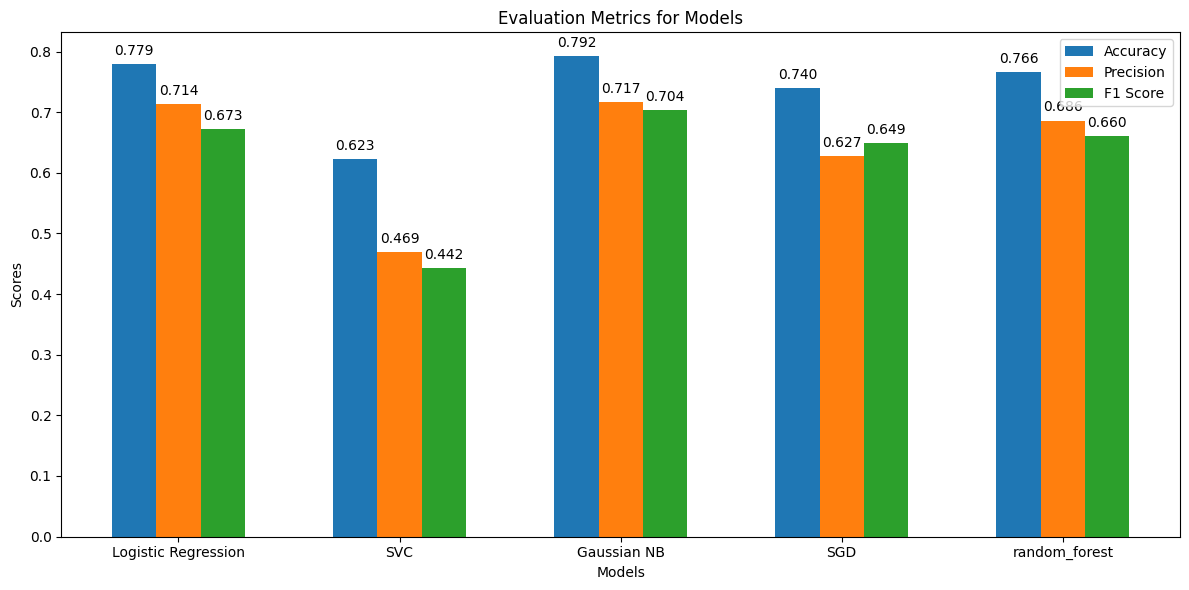

In [237]:
# Assuming best parameters are already obtained
best_logistic_params =  {'C': 37.454011884736246, 'penalty': 'l1', 'solver': 'saga'}
best_svc_params = {'C': 5.924145688620425, 'gamma': 0.46450412719997725, 'kernel': 'rbf'}

best_gnb_params ={'var_smoothing': 3.845401188473625e-08}
best_sgd_params =  {'alpha': 0.0003056137691733707, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'elasticnet', 'tol': 1e-05}
# Random Forest Classifier
best_rf_params = {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 801}


# Initialize models with best parameters
best_logistic_model = LogisticRegression(**best_logistic_params)
best_svc_model = SVC(**best_svc_params)
best_gnb_model = GaussianNB(**best_gnb_params)
best_sgd_model = SGDClassifier(**best_sgd_params)
best_rf_model = RandomForestClassifier(**best_rf_params)

# Train models on the entire training set
best_logistic_model.fit(x_train_scaled, y_train)
best_svc_model.fit(x_train_scaled, y_train)
best_gnb_model.fit(x_train_scaled, y_train)
best_sgd_model.fit(x_train_scaled, y_train)
best_rf_model.fit(x_train_scaled, y_train)

# Predict on the test set
logistic_predictions = best_logistic_model.predict(x_test_scaled)
svc_predictions = best_svc_model.predict(x_test_scaled)
gnb_predictions = best_gnb_model.predict(x_test_scaled)
rf_predictions = best_rf_model.predict(x_test_scaled)
sgd_predictions = best_sgd_model.predict(x_test_scaled)

# Evaluate the models
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)

svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)

gnb_accuracy = accuracy_score(y_test, gnb_predictions)
gnb_precision = precision_score(y_test, gnb_predictions)
gnb_f1 = f1_score(y_test, gnb_predictions)

# SGD Classifier
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
sgd_precision = precision_score(y_test, sgd_predictions)
sgd_f1 = f1_score(y_test, sgd_predictions)

#Random forest 
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Evaluation metrics
models = ['Logistic Regression', 'SVC', 'Gaussian NB','SGD','random_forest']
accuracies = [logistic_accuracy, svc_accuracy, gnb_accuracy,sgd_accuracy,rf_accuracy ]
precisions = [logistic_precision, svc_precision, gnb_precision,sgd_precision,rf_precision]

f1_scores = [logistic_f1, svc_f1, gnb_f1,sgd_f1,rf_f1]

# Plotting the bar graph
x = range(len(models))
bar_width = 0.2

plt.figure(figsize=(12, 6))

# Plotting bars for Accuracy, Precision, and F1 Score
plt.bar(x, accuracies, width=bar_width, label='Accuracy', align='center')
plt.bar([i + bar_width for i in x], precisions, width=bar_width, label='Precision', align='center')
plt.bar([i + 2 * bar_width for i in x], f1_scores, width=bar_width, label='F1 Score', align='center')

# Adding numeric values on top of the bars
for i, metric_values in enumerate(zip(accuracies, precisions, f1_scores)):
    for j, value in enumerate(metric_values):
        plt.text(i + (j * bar_width), value + 0.01, f'{value:.3f}', ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Models')
plt.xticks([i + bar_width for i in x], models)
plt.legend()
plt.tight_layout()

plt.show()

In [238]:
x_train.shape[1]

8

In [254]:
# Create a simple neural network for logistic regression
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(units=104, activation='relu'),
    tf.keras.layers.Dense(units=52, activation='relu'),
    tf.keras.layers.Dense(units=52, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_test_scaled, y_test) , )

# Evaluate the model on the test set
y_pred_proba = model.predict(x_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 0.6296 - accuracy: 0.6156 - val_loss: 0.5867 - val_accuracy: 0.6623
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7459 - val_loss: 0.5269 - val_accuracy: 0.7273
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4713 - accuracy: 0.7704 - val_loss: 0.5042 - val_accuracy: 0.7532
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.7834 - val_loss: 0.5085 - val_accuracy: 0.7792
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4401 - accuracy: 0.7964 - val_loss: 0.5031 - val_accuracy: 0.7857
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4305 - accuracy: 0.7883 - val_loss: 0.5069 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4249 - accuracy: 0.7997 - val_loss: 0.5103 - val_accuracy: 0.7727
Epoch 8/100


Epoch 1/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0190 - accuracy: 0.9984 - val_loss: 1.8452 - val_accuracy: 0.7208
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9984 - val_loss: 1.8629 - val_accuracy: 0.7013
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.9935 - val_loss: 1.9899 - val_accuracy: 0.6753
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0492 - accuracy: 0.9805 - val_loss: 1.9296 - val_accuracy: 0.7208
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9886 - val_loss: 2.0949 - val_accuracy: 0.6623
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9886 - val_loss: 1.8336 - val_accuracy: 0.6948
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0464 - accuracy: 0.9886 - val_loss: 1.8528 - val_accuracy: 0.7208
Epoch 8/100
2

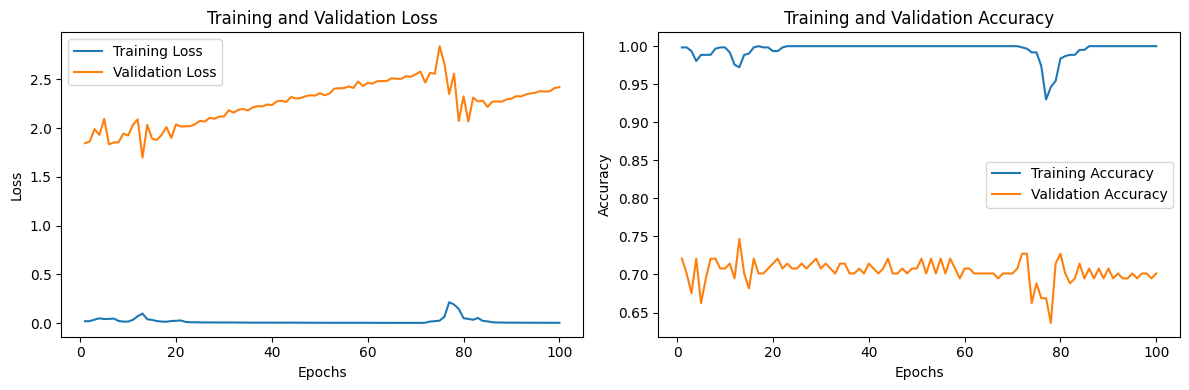

In [255]:
# Train the model with a different number of iterations (epochs)
num_iterations = 100  # Adjust this parameter
history = model.fit(x_train_scaled, y_train, epochs=num_iterations, batch_size=32, validation_data=(x_test_scaled, y_test))

# Access training history values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_iterations + 1), train_loss, label='Training Loss')
plt.plot(range(1, num_iterations + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_iterations + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_iterations + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [256]:
# Create a simple neural network for logistic regression
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(units=104, activation='relu'),
    tf.keras.layers.Dense(units=52, activation='relu'),
    tf.keras.layers.Dense(units=52, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_test_scaled, y_test) , )

# Evaluate the model on the test set
y_pred_proba = model.predict(x_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/100
20/20 [==============================] - 1s 16ms/step - loss: 0.6868 - accuracy: 0.5765 - val_loss: 0.6599 - val_accuracy: 0.6623
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6616 - accuracy: 0.6726 - val_loss: 0.6418 - val_accuracy: 0.7208
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6432 - accuracy: 0.6906 - val_loss: 0.6259 - val_accuracy: 0.7338
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6268 - accuracy: 0.7085 - val_loss: 0.6119 - val_accuracy: 0.7078
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6123 - accuracy: 0.7068 - val_loss: 0.6002 - val_accuracy: 0.7143
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5998 - accuracy: 0.7101 - val_loss: 0.5900 - val_accuracy: 0.7143
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5887 - accuracy: 0.7134 - val_loss: 0.5802 - val_accuracy: 0.7143
Epoch 8/100


Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3917 - accuracy: 0.8046 - val_loss: 0.5400 - val_accuracy: 0.7403
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3911 - accuracy: 0.8062 - val_loss: 0.5400 - val_accuracy: 0.7403
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3911 - accuracy: 0.8062 - val_loss: 0.5414 - val_accuracy: 0.7403
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3902 - accuracy: 0.8078 - val_loss: 0.5419 - val_accuracy: 0.7403
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3894 - accuracy: 0.8062 - val_loss: 0.5419 - val_accuracy: 0.7403
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.8127 - val_loss: 0.5446 - val_accuracy: 0.7338
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3883 - accuracy: 0.8127 - val_loss: 0.5461 - val_accuracy: 0.7403
Epoch 8/100
2

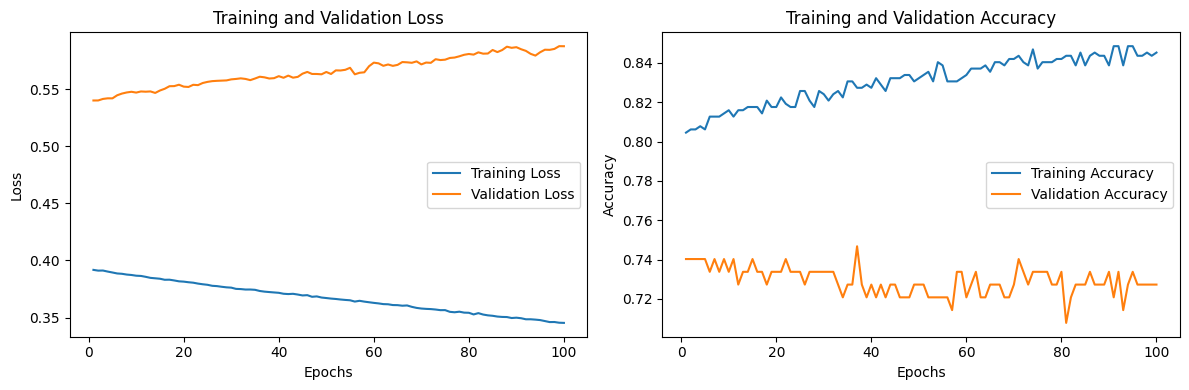

In [257]:
# Train the model with a different number of iterations (epochs)
num_iterations = 100  # Adjust this parameter
history = model.fit(x_train_scaled, y_train, epochs=num_iterations, batch_size=32, validation_data=(x_test_scaled, y_test))

# Access training history values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_iterations + 1), train_loss, label='Training Loss')
plt.plot(range(1, num_iterations + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_iterations + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_iterations + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [259]:
# Create a  neural network for logistic regression with 5 epochs
final_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(units=104, activation='relu'),
    tf.keras.layers.Dense(units=52, activation='relu'),
    tf.keras.layers.Dense(units=52, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
final_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
final_model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(x_test_scaled, y_test) , )

# Evaluate the model on the test set
y_pred_proba = model.predict(x_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5130 - val_loss: 0.6840 - val_accuracy: 0.6234
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6778 - accuracy: 0.6205 - val_loss: 0.6744 - val_accuracy: 0.6688
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6669 - accuracy: 0.6368 - val_loss: 0.6657 - val_accuracy: 0.6623
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6571 - accuracy: 0.6515 - val_loss: 0.6589 - val_accuracy: 0.6494
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6494 - accuracy: 0.6515 - val_loss: 0.6530 - val_accuracy: 0.6494
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.6531 - val_loss: 0.6480 - val_accuracy: 0.6494
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6369 - accuracy: 0.6531 - val_loss: 0.6429 - val_accuracy: 0.6494
Epoch 8/10
20/20 [=

Text(0.5, 1.0, 'Confusion Matrix')

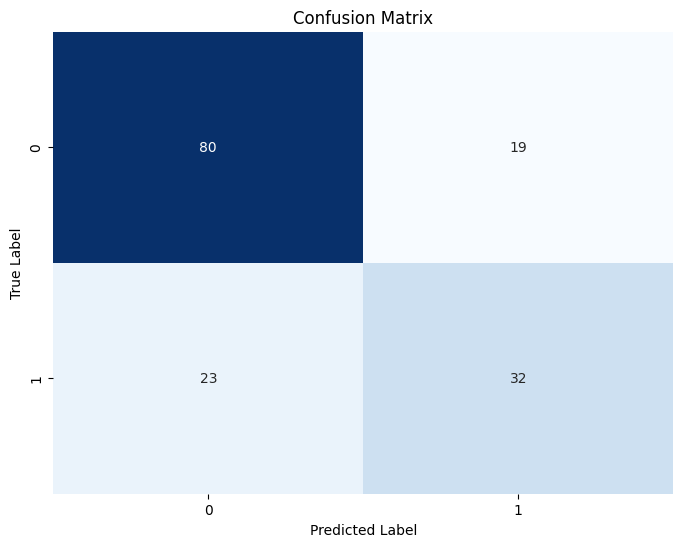

In [260]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')